In [1]:
#IMPORTING MOSTLY USED LIBRARIES
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#Reading dataset
data=pd.read_csv(r"nasa.csv",index_col=None,header=0)
data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


## EDA(EXPLORATORY DATA ANALYSIS)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
Neo Reference ID                4687 non-null int64
Name                            4687 non-null int64
Absolute Magnitude              4687 non-null float64
Est Dia in KM(min)              4687 non-null float64
Est Dia in KM(max)              4687 non-null float64
Est Dia in M(min)               4687 non-null float64
Est Dia in M(max)               4687 non-null float64
Est Dia in Miles(min)           4687 non-null float64
Est Dia in Miles(max)           4687 non-null float64
Est Dia in Feet(min)            4687 non-null float64
Est Dia in Feet(max)            4687 non-null float64
Close Approach Date             4687 non-null object
Epoch Date Close Approach       4687 non-null int64
Relative Velocity km per sec    4687 non-null float64
Relative Velocity km per hr     4687 non-null float64
Miles per hour                  4687 non-null float64
Miss Dist.(Astronomical)        4687

#####  Missing values not found in any feature 

In [4]:
data.duplicated().sum()

0

##### no duplicate values seen int the data

## PRE-PROCESSING AND FEATURE SELECTION

In [5]:
data.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [6]:
#droping features
data.drop(['Neo Reference ID','Name','Close Approach Date','Epoch Date Close Approach','Orbit ID','Orbit Determination Date'],axis=1,inplace=True)

#the above features are just the name and date of the asteriod occurence so dropping these features.

In [7]:
data.shape

(4687, 34)

In [8]:
#looking for null values
data.isnull().sum()

Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination                     0
Asc Node Longitude              0
Orbital Period                  0
Perihelion Distance             0
Perihelion Arg                  0
Aphelion Dist                   0
Perihelion Tim

##### no null values seen so moving forward to check unique values

In [9]:
for i in data.columns:
    print({i:data[i].unique()})

{'Absolute Magnitude': array([21.6  , 21.3  , 20.3  , 27.4  , 19.6  , 19.2  , 17.8  , 21.5  ,
       22.4  , 25.8  , 25.   , 19.1  , 18.8  , 25.2  , 20.   , 21.   ,
       22.3  , 22.7  , 26.1  , 20.6  , 21.7  , 23.9  , 26.989, 19.3  ,
       22.6  , 23.8  , 28.6  , 21.2  , 22.8  , 23.6  , 19.8  , 20.1  ,
       19.9  , 26.9  , 21.424, 17.3  , 26.5  , 28.15 , 20.8  , 25.6  ,
       25.4  , 19.4  , 20.9  , 18.9  , 24.   , 21.494, 17.4  , 22.1  ,
       20.5  , 22.2  , 24.4  , 24.3  , 26.2  , 20.616, 17.5  , 22.   ,
       23.   , 16.5  , 20.2  , 27.1  , 27.2  , 21.571, 18.7  , 18.1  ,
       19.5  , 19.7  , 16.7  , 17.9  , 23.7  , 20.7  , 24.1  , 27.8  ,
       18.3  , 24.7  , 18.2  , 24.8  , 26.692, 25.187, 20.4  , 24.5  ,
       26.6  , 25.3  , 19.   , 29.7  , 23.5  , 23.4  , 26.   , 22.5  ,
       18.   , 27.6  , 25.7  , 22.9  , 21.8  , 21.4  , 23.3  , 26.3  ,
       28.7  , 28.2  , 21.51 , 18.5  , 21.1  , 26.8  , 25.579, 24.9  ,
       24.771, 25.9  , 27.5  , 14.5  , 18.6  , 19.313,

##### As it is observed from unique values that Equinox and orbiting body have single value we will drop it.

In [10]:
data.drop(["Equinox",'Orbiting Body'],axis=1,inplace=True)

In [11]:
data.shape

(4687, 32)

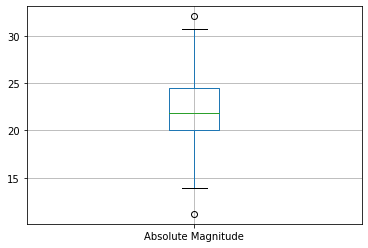

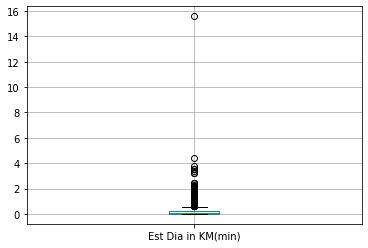

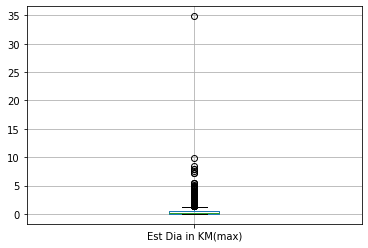

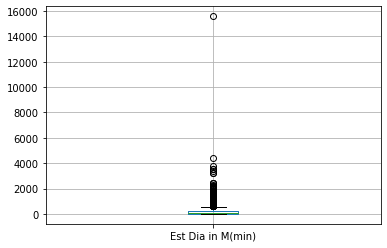

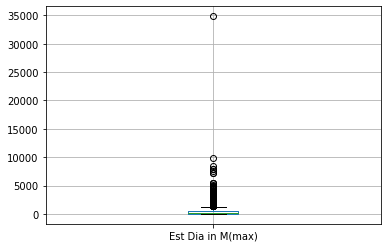

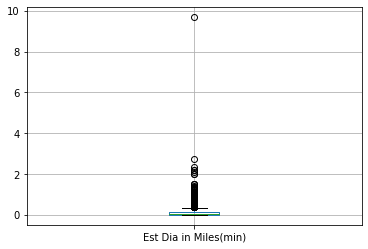

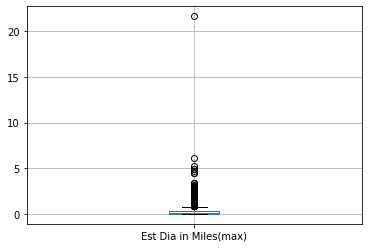

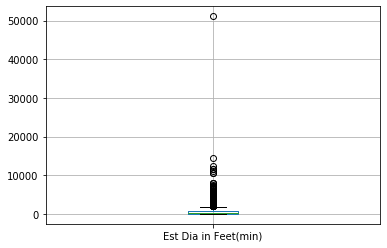

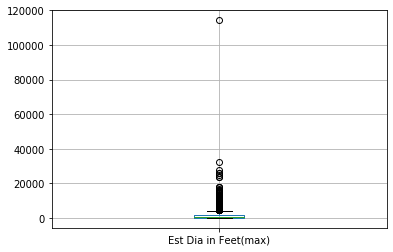

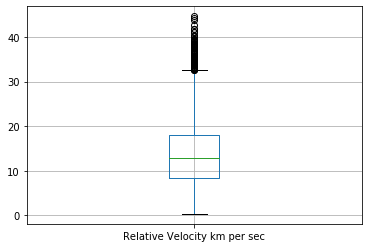

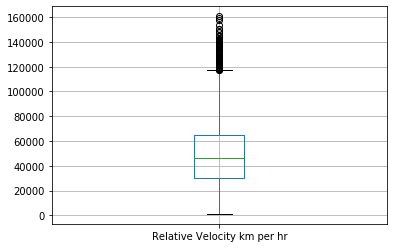

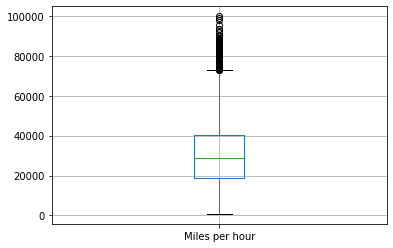

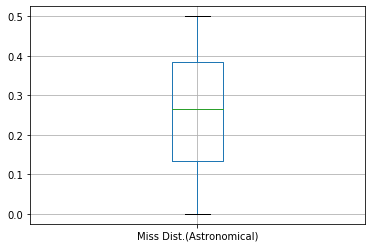

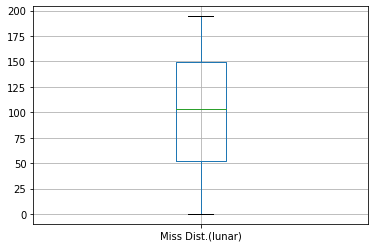

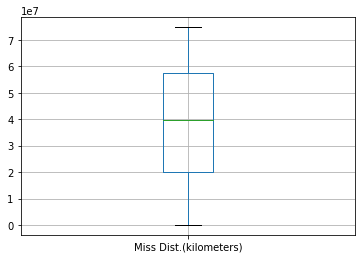

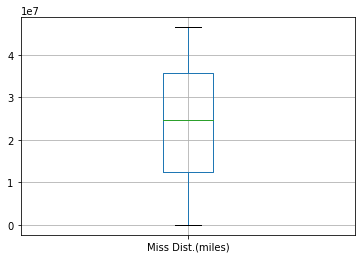

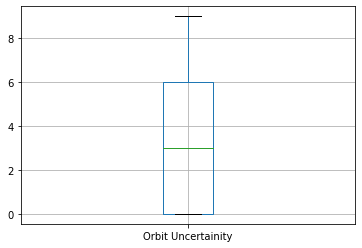

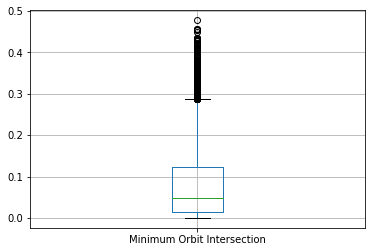

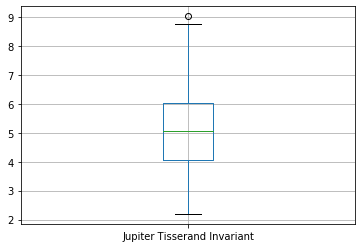

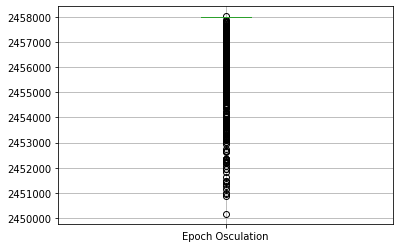

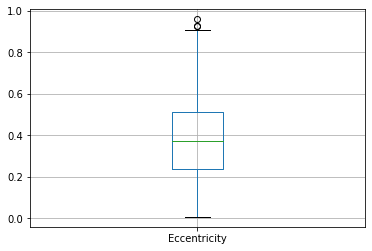

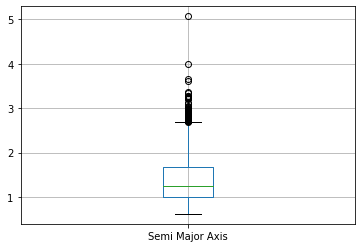

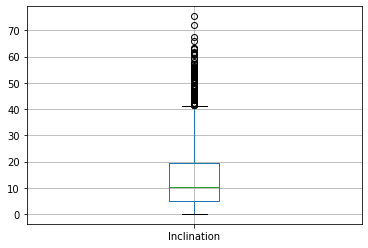

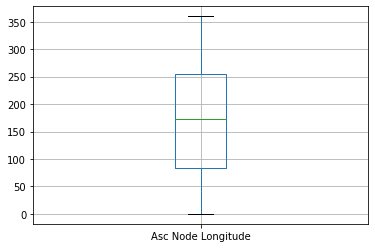

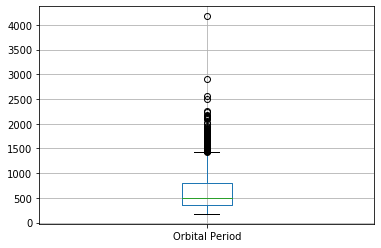

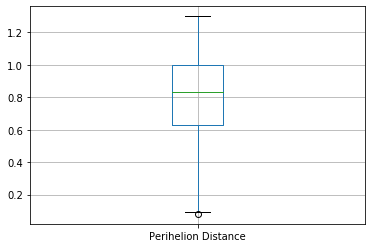

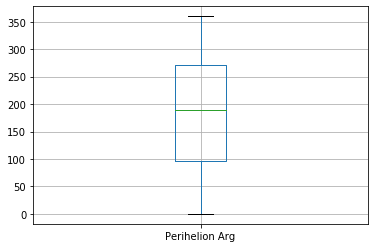

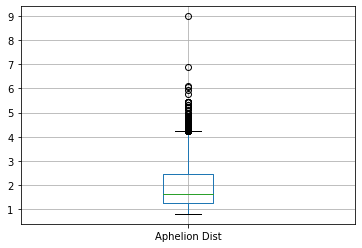

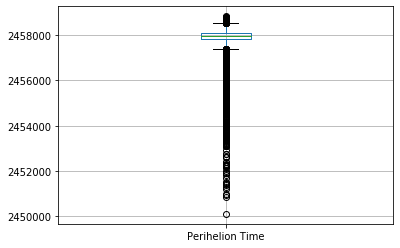

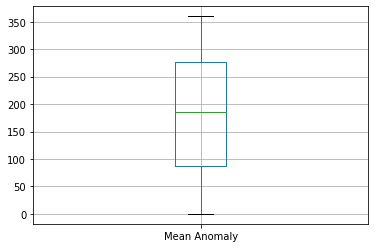

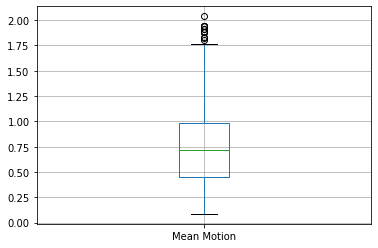

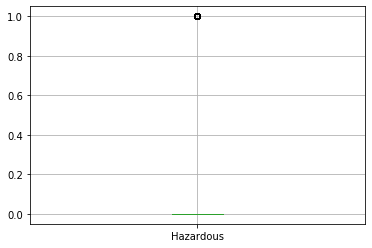

In [12]:
#checking for outliers
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

In [13]:
#checking for categorical variable
colname=[]
for x in data.columns:
    if data[x].dtype=='object':
        colname.append(x)
colname

[]

##### There is no categorical variable but as concluded from data info are dependent variable is boolean so we need conversion

In [14]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

data['Hazardous']=le.fit_transform(data['Hazardous'])

data.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173874,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


In [15]:
#splitting X and Y
X=data.values[:,0:-1]
Y=data.values[:,-1]

In [16]:
print(X.shape)
print(Y.shape)


(4687, 31)
(4687,)


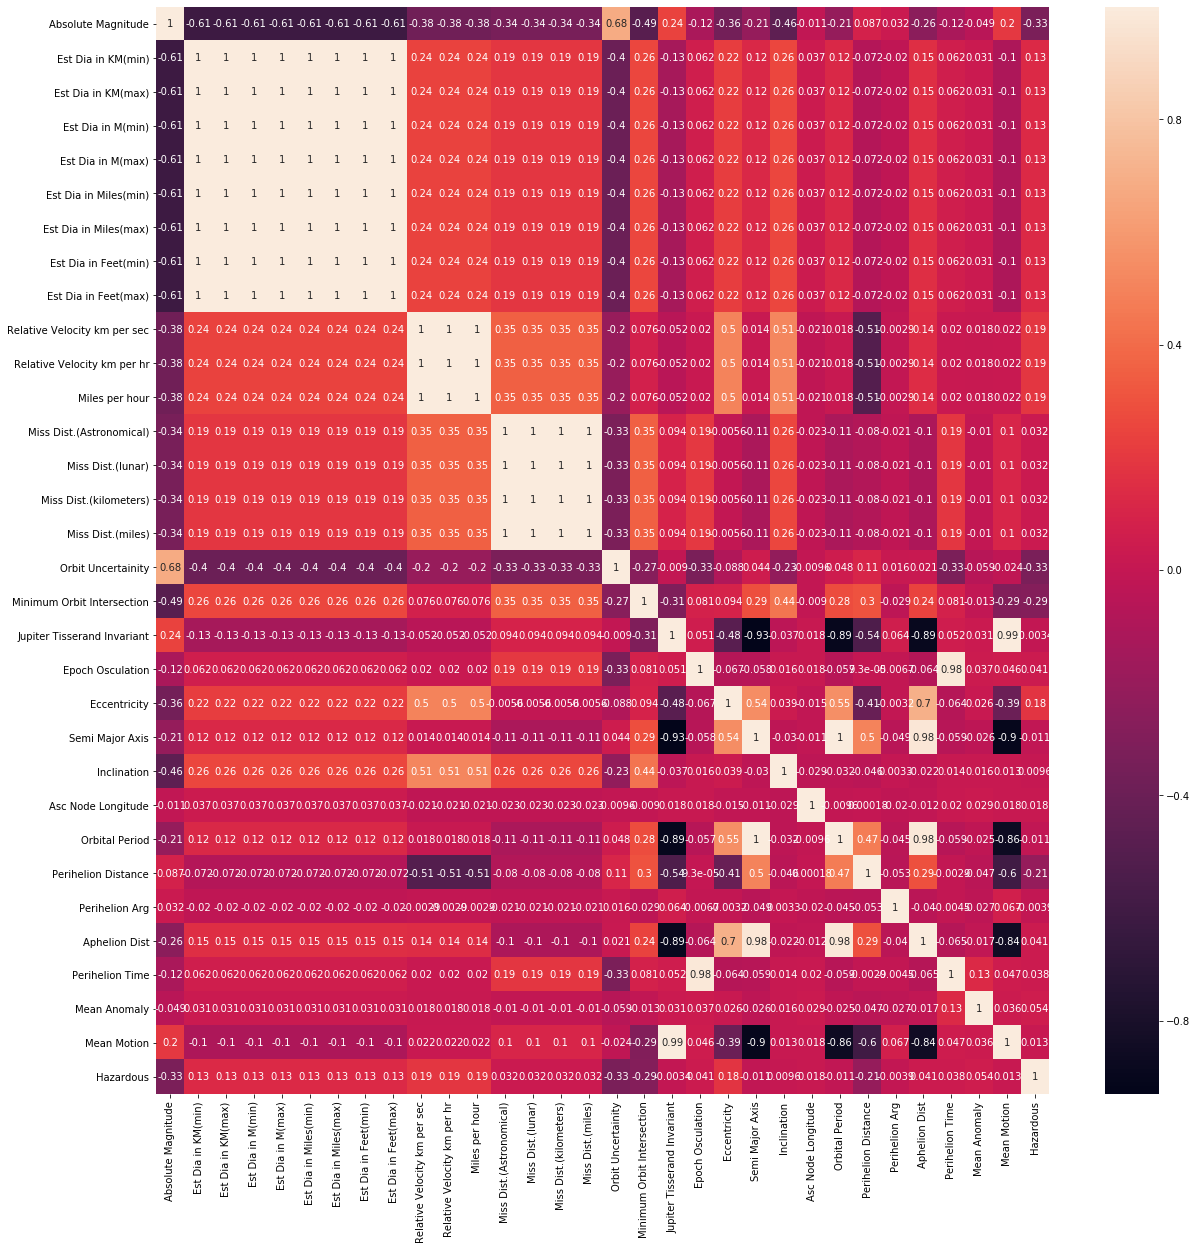

In [17]:
#looking for multicolinearity between X variable
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True)

In [18]:
data.columns

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)',
       'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'Relative Velocity km per sec', 'Relative Velocity km per hr',
       'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Hazardous'],
      dtype='object')

In [19]:
#on the basis of multicollinearty dropping features.
data.drop(['Semi Major Axis','Mean Motion',"Aphelion Dist",'Orbital Period','Jupiter Tisserand Invariant','Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)',
       'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)'],axis=1,inplace=True)

In [20]:
data.shape

(4687, 19)

In [21]:
data.head()

,Absolute Magnitude,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit Uncertainity,Minimum Orbit Intersection,Epoch Osculation,Eccentricity,Inclination,Asc Node Longitude,Perihelion Distance,Perihelion Arg,Perihelion Time,Mean Anomaly,Hazardous
0,21.6,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,5,0.025282,2458000.5,0.425549,6.025981,314.373913,0.808259,57.257470,2.458162e+06,264.837533,1
1,21.3,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,3,0.186935,2458000.5,0.351674,28.412996,136.717242,0.718200,313.091975,2.457795e+06,173.741112,0
2,20.3,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,0,0.043058,2458000.5,0.348248,4.237961,259.475979,0.950791,248.415038,2.458120e+06,292.893654,1
3,27.4,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,6,0.005512,2458000.5,0.216578,7.905894,57.173266,0.983902,18.707701,2.457902e+06,68.741007,0
4,21.6,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,1,0.034798,2458000.5,0.210448,16.793382,84.629307,0.967687,158.263596,2.457814e+06,135.142133,1


In [22]:
#scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)
#X=scaler.fit_transform(X)
#print(X)

In [23]:
print(X)

[[-0.23104209 -0.20941058 -0.20941058 ...  0.45919023  0.77839321
  -0.43110028]
 [-0.33482448 -0.15840557 -0.15840557 ...  0.07081791 -0.06909298
   0.31258164]
 [-0.68076581  0.07278876  0.07278876 ...  0.41557933  1.03940428
  -0.52211437]
 ...
 [ 0.14949337 -0.34623784 -0.34623784 ...  0.60624482  0.20776991
  -0.63207867]
 [-0.16185382 -0.23970271 -0.23970271 ...  0.5933032   0.2079915
  -0.56766111]
 [-1.09278193  0.53049632  0.53049632 ...  0.62542342  0.03397983
  -0.54733945]]


In [24]:
#BASIC LOGISTIC REGRESSION MODEL

from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=10)  


In [25]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3280, 31)
(3280,)
(1407, 31)
(1407,)


In [26]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(Y_pred)

[0. 0. 0. ... 0. 0. 0.]


C:\Users\Onkar Satle\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[1141   34]
 [  33  199]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      1175
         1.0       0.85      0.86      0.86       232

    accuracy                           0.95      1407
   macro avg       0.91      0.91      0.91      1407
weighted avg       0.95      0.95      0.95      1407

Accuracy of the model:  0.9523809523809523


In [28]:
#TUNING THE MODEL BY ADJUSTING THREESHOLD
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[9.95118028e-01 4.88197167e-03]
 [7.98060171e-01 2.01939829e-01]
 [9.99999955e-01 4.47903216e-08]
 ...
 [9.99956460e-01 4.35400676e-05]
 [9.99956907e-01 4.30934717e-05]
 [9.99999966e-01 3.36501968e-08]]


In [29]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 70  , type 2 error : 23  , type 1 error: 47
Errors at threshold  0.41000000000000003 : 68  , type 2 error : 23  , type 1 error: 45
Errors at threshold  0.42000000000000004 : 66  , type 2 error : 23  , type 1 error: 43
Errors at threshold  0.43000000000000005 : 66  , type 2 error : 24  , type 1 error: 42
Errors at threshold  0.44000000000000006 : 63  , type 2 error : 25  , type 1 error: 38
Errors at threshold  0.45000000000000007 : 64  , type 2 error : 26  , type 1 error: 38
Errors at threshold  0.4600000000000001 : 63  , type 2 error : 27  , type 1 error: 36
Errors at threshold  0.4700000000000001 : 65  , type 2 error : 29  , type 1 error: 36
Errors at threshold  0.4800000000000001 : 67  , type 2 error : 31  , type 1 error: 36
Errors at threshold  0.4900000000000001 : 67  , type 2 error : 32  , type 1 error: 35
Errors at threshold  0.5000000000000001 : 67  , type 2 error : 33  , type 1 error: 34
Errors at threshold  0.5100000000000001 : 69  , type 2 error : 3

##### we concluded that 0.46 threeshold have low error in total.so setting the threeshold to 0.46

In [30]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.46:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
#print(y_pred_class)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,y_pred_class))

acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)

[[1139   36]
 [  27  205]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      1175
         1.0       0.85      0.88      0.87       232

    accuracy                           0.96      1407
   macro avg       0.91      0.93      0.92      1407
weighted avg       0.96      0.96      0.96      1407

Accuracy of the model:  0.9552238805970149


# BUILDING KNN MODEL

In [32]:
#predicting using the KNeighbors_classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))), metric= "euclidean")
#euclidean,manhattan,minkowski
#fit the model on  the data and predict the values

model_KNN.fit(X_train,Y_train)
Y_pred=model_KNN.predict(X_test)
print(list(zip(Y_test,Y_pred)))


[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[1170    5]
 [ 183   49]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93      1175
         1.0       0.91      0.21      0.34       232

    accuracy                           0.87      1407
   macro avg       0.89      0.60      0.63      1407
weighted avg       0.87      0.87      0.83      1407

Accuracy of the model:  0.8663823738450604


##### TUNING THE MODEL

In [34]:
from sklearn.metrics import accuracy_score
my_dict={}
for K in range(1,35):
    model_KNN = KNeighborsClassifier(n_neighbors=K,metric="minkowski")
    model_KNN.fit(X_train, Y_train) 
    Y_pred = model_KNN.predict(X_test)
    print ("Accuracy is ", accuracy_score(Y_test,Y_pred), "for K-Value:",K)
    my_dict[K]=accuracy_score(Y_test,Y_pred)

Accuracy is  0.8749111584932481 for K-Value: 1
Accuracy is  0.8805970149253731 for K-Value: 2
Accuracy is  0.8784648187633263 for K-Value: 3
Accuracy is  0.8798862828713575 for K-Value: 4
Accuracy is  0.8827292110874201 for K-Value: 5
Accuracy is  0.8791755508173419 for K-Value: 6
Accuracy is  0.8891257995735607 for K-Value: 7
Accuracy is  0.8791755508173419 for K-Value: 8
Accuracy is  0.8884150675195451 for K-Value: 9
Accuracy is  0.8763326226012793 for K-Value: 10
Accuracy is  0.8869936034115139 for K-Value: 11
Accuracy is  0.8749111584932481 for K-Value: 12
Accuracy is  0.8862828713574982 for K-Value: 13
Accuracy is  0.8805970149253731 for K-Value: 14
Accuracy is  0.8891257995735607 for K-Value: 15
Accuracy is  0.8791755508173419 for K-Value: 16
Accuracy is  0.8855721393034826 for K-Value: 17
Accuracy is  0.8784648187633263 for K-Value: 18
Accuracy is  0.8848614072494669 for K-Value: 19
Accuracy is  0.8777540867093105 for K-Value: 20
Accuracy is  0.8841506751954513 for K-Value: 21
A

##### much variation is not seen in minkowski

In [35]:
from sklearn.metrics import accuracy_score
my_dict={}
for K in range(1,35):
    model_KNN = KNeighborsClassifier(n_neighbors=K,metric="manhattan")
    model_KNN.fit(X_train, Y_train) 
    Y_pred = model_KNN.predict(X_test)
    print ("Accuracy is ", accuracy_score(Y_test,Y_pred), "for K-Value:",K)
    my_dict[K]=accuracy_score(Y_test,Y_pred)

Accuracy is  0.9019189765458422 for K-Value: 1
Accuracy is  0.8841506751954513 for K-Value: 2
Accuracy is  0.8941009239516702 for K-Value: 3
Accuracy is  0.8898365316275764 for K-Value: 4
Accuracy is  0.9026297085998578 for K-Value: 5
Accuracy is  0.8941009239516702 for K-Value: 6
Accuracy is  0.906183368869936 for K-Value: 7
Accuracy is  0.8933901918976546 for K-Value: 8
Accuracy is  0.9097370291400142 for K-Value: 9
Accuracy is  0.8898365316275764 for K-Value: 10
Accuracy is  0.9033404406538735 for K-Value: 11
Accuracy is  0.892679459843639 for K-Value: 12
Accuracy is  0.9026297085998578 for K-Value: 13
Accuracy is  0.8912579957356077 for K-Value: 14
Accuracy is  0.8990760483297797 for K-Value: 15
Accuracy is  0.8941009239516702 for K-Value: 16
Accuracy is  0.9090262970859986 for K-Value: 17
Accuracy is  0.8948116560056859 for K-Value: 18
Accuracy is  0.898365316275764 for K-Value: 19
Accuracy is  0.8877043354655295 for K-Value: 20
Accuracy is  0.8941009239516702 for K-Value: 21
Accu

##### manhattan is performing better then minkowski

In [36]:
from sklearn.metrics import accuracy_score
my_dict={}
for K in range(1,35):
    model_KNN = KNeighborsClassifier(n_neighbors=K,metric="euclidean")
    model_KNN.fit(X_train, Y_train) 
    Y_pred = model_KNN.predict(X_test)
    print ("Accuracy is ", accuracy_score(Y_test,Y_pred), "for K-Value:",K)
    my_dict[K]=accuracy_score(Y_test,Y_pred)

Accuracy is  0.8749111584932481 for K-Value: 1
Accuracy is  0.8805970149253731 for K-Value: 2
Accuracy is  0.8784648187633263 for K-Value: 3
Accuracy is  0.8798862828713575 for K-Value: 4
Accuracy is  0.8827292110874201 for K-Value: 5
Accuracy is  0.8791755508173419 for K-Value: 6
Accuracy is  0.8891257995735607 for K-Value: 7
Accuracy is  0.8791755508173419 for K-Value: 8
Accuracy is  0.8884150675195451 for K-Value: 9
Accuracy is  0.8763326226012793 for K-Value: 10
Accuracy is  0.8869936034115139 for K-Value: 11
Accuracy is  0.8749111584932481 for K-Value: 12
Accuracy is  0.8862828713574982 for K-Value: 13
Accuracy is  0.8805970149253731 for K-Value: 14
Accuracy is  0.8891257995735607 for K-Value: 15
Accuracy is  0.8791755508173419 for K-Value: 16
Accuracy is  0.8855721393034826 for K-Value: 17
Accuracy is  0.8784648187633263 for K-Value: 18
Accuracy is  0.8848614072494669 for K-Value: 19
Accuracy is  0.8777540867093105 for K-Value: 20
Accuracy is  0.8841506751954513 for K-Value: 21
A

##### none of the knn model is better then logistic model (logistic work better in binary classification)so we will move towards SVC

# BUILDING SVC MODEL

In [37]:
from sklearn.svm import SVC
svc_model=SVC(kernel='rbf',C=1,gamma=0.1)
svc_model.fit(X_train, Y_train)
Y_pred=svc_model.predict(X_test)
print(list(Y_pred))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[1142   33]
 [  53  179]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      1175
         1.0       0.84      0.77      0.81       232

    accuracy                           0.94      1407
   macro avg       0.90      0.87      0.89      1407
weighted avg       0.94      0.94      0.94      1407

Accuracy of the model:  0.9388770433546553
